# KDD Cup 2009

## Customer Relationship Prediction
https://www.kdd.org/kdd-cup/view/kdd-cup-2009/Intro

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import sklearn
from sklearn.metrics import roc_curve, auc

### Dados

Foram utilizadas as bases de dados disponíveis em https://www.kdd.org/kdd-cup/view/kdd-cup-2009/Data
Com a competição finalizada, serão utilizados apenas os dados de treino (small) e estes serão divididos em train e test.

In [2]:
small_file = pd.read_csv('..\data\orange_small_train.data', sep = '\t')
small_file

Var1  Var2  Var3  Var4  Var5    Var6  Var7  Var8  Var9  Var10   ...    \
0       NaN   NaN   NaN   NaN   NaN  1526.0   7.0   NaN   NaN    NaN   ...     
1       NaN   NaN   NaN   NaN   NaN   525.0   0.0   NaN   NaN    NaN   ...     
2       NaN   NaN   NaN   NaN   NaN  5236.0   7.0   NaN   NaN    NaN   ...     
3       NaN   NaN   NaN   NaN   NaN     NaN   0.0   NaN   NaN    NaN   ...     
4       NaN   NaN   NaN   NaN   NaN  1029.0   7.0   NaN   NaN    NaN   ...     
5       NaN   NaN   NaN   NaN   NaN   658.0   7.0   NaN   NaN    NaN   ...     
6       NaN   NaN   NaN   NaN   NaN  1680.0   7.0   NaN   NaN    NaN   ...     
7       NaN   NaN   NaN   NaN   NaN    77.0   0.0   NaN   NaN    NaN   ...     
8       NaN   NaN   NaN   NaN   NaN  1176.0   7.0   NaN   NaN    NaN   ...     
9       NaN   NaN   NaN   NaN   NaN  1141.0   7.0   NaN   NaN    NaN   ...     
10      NaN   NaN   NaN   NaN   NaN   490.0   7.0   NaN   NaN    NaN   ...     
11      NaN   NaN   NaN   NaN   NaN   798.0  14.0   NaN   NaN    NaN   ...     
12      NaN   NaN   NaN   NaN   NaN   595.0   0.0   NaN   NaN    NaN   ...     
13      NaN   NaN   NaN   NaN   NaN  2268.0   0.0   NaN   NaN    NaN   ...     
14      NaN   NaN   NaN   NaN   NaN  3633.0   7.0   NaN   NaN    NaN   ...     
15      NaN   NaN   NaN   NaN   NaN   259.0   0.0   NaN   NaN    NaN   ...     
16      NaN   NaN   NaN   NaN   NaN  5152.0   7.0   NaN   NaN    NaN   ...     
17      NaN   NaN   NaN   NaN   NaN  1449.0   7.0   NaN   NaN    NaN   ...     
18      NaN   NaN   NaN   NaN   NaN   574.0   7.0   NaN   NaN    NaN   ...     
19      NaN   NaN   NaN   NaN   NaN   658.0   7.0   NaN   NaN    NaN   ...     
20      NaN   NaN   NaN   NaN   NaN   245.0   0.0   NaN   NaN    NaN   ...     
21      NaN   NaN   NaN   NaN   NaN    14.0   0.0   NaN   NaN    NaN   ...     
22      NaN   NaN   NaN   NaN   NaN   826.0   0.0   NaN   NaN    NaN   ...     
23      NaN   NaN   NaN   NaN   NaN   854.0   7.0   NaN   NaN    NaN   ...     
24      NaN   NaN   NaN   NaN   NaN  1218.0   7.0   NaN   NaN    NaN   ...     
25      NaN   NaN   NaN   NaN   NaN  1043.0   7.0   NaN   NaN    NaN   ...     
26      NaN   NaN   NaN   0.0   NaN     NaN   NaN   NaN   NaN    NaN   ...     
27      NaN   NaN   NaN   NaN   NaN  1533.0   7.0   NaN   NaN    NaN   ...     
28      NaN   NaN   NaN   NaN   NaN   161.0   0.0   NaN   NaN    NaN   ...     
29      NaN   NaN   NaN   NaN   NaN    63.0   0.0   NaN   NaN    NaN   ...     
...     ...   ...   ...   ...   ...     ...   ...   ...   ...    ...   ...     
49970   NaN   NaN   NaN   NaN   NaN   154.0   0.0   NaN   NaN    NaN   ...     
49971   NaN   0.0   0.0   NaN   NaN     NaN   NaN   NaN   NaN    NaN   ...     
49972   NaN   NaN   NaN   NaN   NaN   714.0   7.0   NaN   NaN    NaN   ...     
49973   NaN   NaN   NaN   NaN   NaN  1841.0   7.0   NaN   NaN    NaN   ...     
49974   NaN   NaN   NaN   NaN   NaN  6671.0   7.0   NaN   NaN    NaN   ...     
49975   NaN   NaN   NaN   NaN   NaN   511.0   7.0   NaN   NaN    NaN   ...     
49976   NaN   NaN   NaN   NaN   NaN  1470.0  14.0   NaN   NaN    NaN   ...     
49977   NaN   NaN   NaN   NaN   NaN   945.0   7.0   NaN   NaN    NaN   ...     
49978   NaN   NaN   NaN   NaN   NaN   420.0   7.0   NaN   NaN    NaN   ...     
49979   NaN   NaN   NaN   NaN   NaN     NaN   0.0   NaN   NaN    NaN   ...     
49980   NaN   NaN   NaN   NaN   NaN  1302.0   7.0   NaN   NaN    NaN   ...     
49981   NaN   NaN   NaN   NaN   NaN  6853.0   7.0   NaN   NaN    NaN   ...     
49982   NaN   NaN   NaN   NaN   NaN   546.0   0.0   NaN   NaN    NaN   ...     
49983   NaN   NaN   NaN   NaN   NaN  1211.0   NaN   NaN   NaN    NaN   ...     
49984   NaN   NaN   NaN   NaN   NaN   882.0   7.0   NaN   NaN    NaN   ...     
49985   NaN   NaN   NaN   NaN   NaN     0.0   0.0   NaN   NaN    NaN   ...     
49986   NaN   NaN   NaN   NaN   NaN  1778.0   NaN   NaN   NaN    NaN   ...     
49987   NaN   NaN   NaN   NaN   NaN  3577.0   7.0   NaN   NaN    NaN   ...     
49988  

O problema informa que as colunas de 0 a 190 são numéricas e as demais, até 230, são categóricas.
Desta forma, alteramos os tipos das colunas para que sejam condizentes com a definição.

In [3]:
var_names = small_file.columns
data_types = {var_name: small_file[var_name].dtype for var_name in var_names}

for var_name in var_names:
    if data_types[var_name] == int:
        new_column = small_file[var_name].astype(float)
        small_file.loc[:, var_name] = new_column
        data_types[var_name] = new_column.dtype
    elif data_types[var_name] != float:
        new_column = small_file[var_name].astype('category')
        small_file.loc[:, var_name] = new_column
        data_types[var_name] = new_column.dtype

### Data cleaning

Algumas das colunas do dataframe possuem valores nulos para todas as instâncias.
Sendo assim, as mesmas foram removidas.

In [10]:
null_columns = small_file.columns[small_file.isnull().all()]
null_columns

Index([], dtype='object')

In [11]:
for null_column in null_columns:
    small_file = small_file.drop(null_column, axis=1)

A partir da geração do perfil dos dados, observa-se também colunas com alta correlação entre si.

In [12]:
profile_small_file = pandas_profiling.ProfileReport(small_file)

In [13]:
profile_small_file

As colunas rejeitadas por alta correlação também são excluídas do dataframe.

In [14]:
rejected_variables = profile_small_file.get_rejected_variables(threshold=0.9)
print(len(rejected_variables))

30


In [15]:
for rejected_column in rejected_variables:
    small_file = small_file.drop(rejected_column, axis=1)

Calcula missing data das colunas para que altos valores sejam excluídos.

In [16]:
missing_proportion = small_file.isnull().sum() / len(small_file)

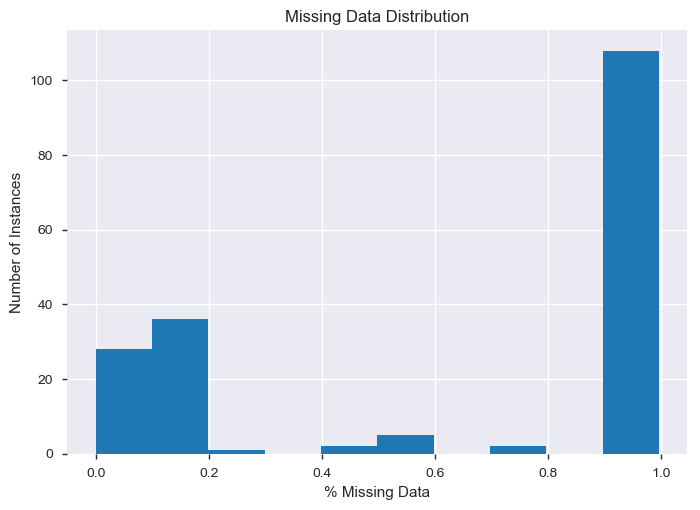

In [17]:
plt.hist(missing_proportion)
plt.xlabel('% Missing Data')
plt.ylabel('Number of Instances')
plt.title('Missing Data Distribution')
plt.show()

In [18]:
var_names = small_file.columns

for var_name in var_names:
    if missing_proportion[var_name] > 0.6:
        small_file = small_file.drop(var_name, axis=1)

### True task labels

Os labels para appetency, churn e upselling encontram-se em arquivos separados entre os dados disponibilizados.
Eles foram agrupados em um único dataframe para facilitar a divisão das bases para treino e teste.

Os tipos das colunas do dataframe também foram alterados para category.

In [19]:
train_appetency = pd.read_csv('..\data\orange_small_train_appetency.labels', header = None, names = ['A'])
train_churn = pd.read_csv('..\data\orange_small_train_churn.labels', header = None, names = ['C'])
train_upselling = pd.read_csv('..\data\orange_small_train_upselling.labels', header = None, names = ['U'])

d = {'appetency': train_appetency['A'], 'churn': train_churn['C'], 'upselling': train_upselling['U']}
true_label_file = pd.DataFrame(data = d)

In [20]:
var_names = true_label_file.columns

for var_name in var_names:
    new_column = true_label_file[var_name].astype('category')
    true_label_file.loc[:, var_name] = new_column

### Divisão do dataframe

As bases de dados foram divididas entre treino e teste com 30% dos dados destinados para teste.

In [21]:
from sklearn import model_selection

(train_file, 
 test_file, 
 train_class, 
 test_class) = model_selection.train_test_split(small_file, true_label_file, test_size=0.3)

### Preenchimento de Missing Data

Para os valores faltantes de colunas numéricas, podemos realizar o preenchimento com a média do valor da própria coluna.
Essa operação será realizada apenas para os dados de **treino** para não impactar a base de teste.

In [22]:
print(train_file.dtypes)

Var6       float64
Var7       float64
Var13      float64
Var21      float64
Var24      float64
Var25      float64
Var28      float64
Var35      float64
Var38      float64
Var44      float64
Var57      float64
Var65      float64
Var72      float64
Var73      float64
Var74      float64
Var76      float64
Var78      float64
Var81      float64
Var83      float64
Var85      float64
Var94      float64
Var109     float64
Var112     float64
Var113     float64
Var119     float64
Var123     float64
Var125     float64
Var126     float64
Var132     float64
Var133     float64
            ...   
Var195    category
Var196    category
Var197    category
Var198    category
Var199    category
Var200    category
Var202    category
Var203    category
Var204    category
Var205    category
Var206    category
Var207    category
Var208    category
Var210    category
Var211    category
Var212    category
Var214    category
Var216    category
Var217    category
Var218    category
Var219    category
Var220    ca

In [23]:
import math

var_names = train_file.columns
var_names = var_names[0:40] # numeric variables

for var_name in var_names:
    mean_column = train_file.loc[:, var_name].mean()
    new_column = train_file[var_name].map(lambda x: mean_column if math.isnan(x) else x)
    train_file.loc[:, var_name] = new_column

C:\Users\Natércia\Anaconda3\envs\py35\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [66]:
var_names = test_file.columns
var_names = var_names[0:40] # numeric variables

for var_name in var_names:
    mean_column = test_file.loc[:, var_name].mean()
    new_column = test_file[var_name].map(lambda x: mean_column if math.isnan(x) else x)
    test_file.loc[:, var_name] = new_column

C:\Users\Natércia\Anaconda3\envs\py35\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Feature importance

Com as bases de dados já divididas e os dados filtrados, podemos analisar as features para cada uma das estimativas que serão realizadas (appetency, churn e upselling).

40
[0.03479576 0.         0.01664145 0.03630862 0.01210287 0.01210287
 0.05900151 0.0075643  0.01361573 0.         0.06505295 0.00453858
 0.00151286 0.02118003 0.02723147 0.00453858 0.         0.08623298
 0.01361573 0.00453858 0.04992436 0.02420575 0.0075643  0.02723147
 0.01664145 0.01361573 0.05295008 0.16944024 0.00302572 0.02723147
 0.01361573 0.01966717 0.         0.00605144 0.0075643  0.04538578
 0.0075643  0.         0.         0.08774584]


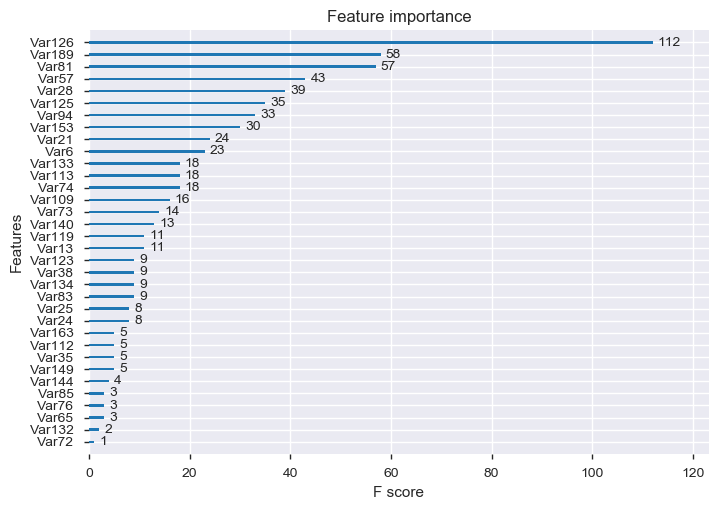

In [24]:
from numpy import loadtxt
from xgboost import XGBClassifier
import xgboost

# split data into X and y
X = train_file.iloc[:,0:40]
y = train_class.iloc[:,0] # appetency

# fit model no training data
model = XGBClassifier()
model.fit(X, y)

# feature importance
numeric_feature_appetency = model.feature_importances_
feature_score_appetency = model.get_booster().get_fscore().items()

print(len(numeric_feature_appetency))
print(numeric_feature_appetency)

# plot
xgboost.plot_importance(model)

40
[0.02325581 0.00290698 0.02180232 0.0130814  0.00290698 0.00436047
 0.01744186 0.00726744 0.0247093  0.00726744 0.04651163 0.01598837
 0.00872093 0.07412791 0.03924419 0.01744186 0.         0.06540698
 0.00872093 0.00436047 0.02325581 0.00290698 0.01162791 0.09156977
 0.02180232 0.01017442 0.01889535 0.19767442 0.01889535 0.02325581
 0.01598837 0.02616279 0.00145349 0.00290698 0.02034884 0.01889535
 0.00581395 0.         0.         0.08284884]


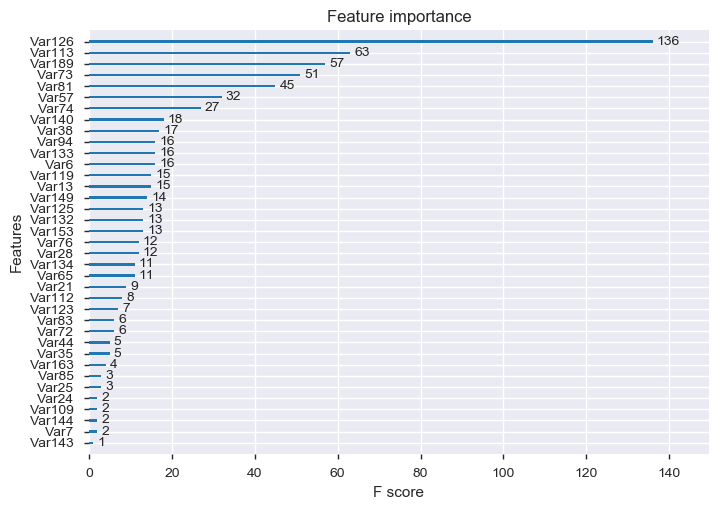

In [218]:
# split data into X and y
X = train_file.iloc[:,0:40]
y = train_class.iloc[:,1] # churn

# fit model no training data
model = XGBClassifier()
model.fit(X, y)

# feature importance
numeric_feature_churn = model.feature_importances_
feature_score_churn = model.get_booster().get_fscore().items()

print(len(numeric_feature_churn))
print(numeric_feature_churn)

# plot
xgboost.plot_importance(model)

40
[0.01319648 0.         0.02346041 0.01173021 0.00146628 0.00733138
 0.13636364 0.00879765 0.03372434 0.         0.03519062 0.
 0.00439883 0.03812317 0.00879765 0.01612903 0.01612903 0.03812317
 0.00733138 0.01173021 0.03812317 0.01173021 0.00146628 0.06304985
 0.02492669 0.01319648 0.01026393 0.23753665 0.00733138 0.00439883
 0.02346041 0.01612903 0.         0.02052786 0.01466276 0.03665689
 0.02346041 0.         0.00293255 0.03812317]


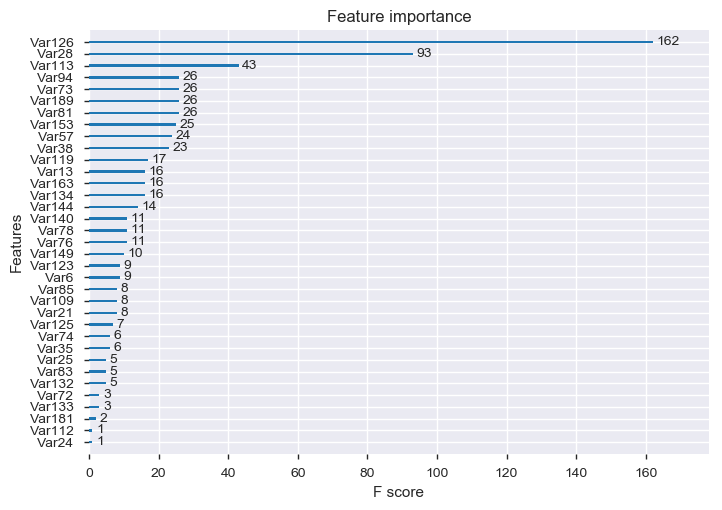

In [26]:
# split data into X and y
X = train_file.iloc[:,0:40]
y = train_class.iloc[:,2] # upselling

# fit model no training data
model = XGBClassifier()
model.fit(X, y)

# feature importance
numeric_feature_upselling = model.feature_importances_
feature_score_upselling = model.get_booster().get_fscore().items()

print(len(numeric_feature_upselling))
print(numeric_feature_upselling)

# plot
xgboost.plot_importance(model)

### Tratamento das variáveis categóricas

As variáveis categóricas não podem ser tratadas da mesma forma que as numércias (inclusive pelos algoritmos de Feature Importance).

Desta forma, é necessário realizar outro tipo de tratamento para as mesmas.

In [27]:
categorical_train_variables = train_file.iloc[:,41:]
categorical_train_variables

Var193            Var195 Var196 Var197   Var198  \
15129     LrdZy8QqgUfkVShG              taul   1K8T   z32l  fhk21Ss   
33964                 RO12              taul   1K8T   487l  fhk21Ss   
49817                 RO12              taul   1K8T   sbZD  3RqwOhN   
22451                 RO12              taul   1K8T   X94c  iJzviRg   
5277                  RO12              taul   1K8T   487l  SohyOPj   
11718                 RO12              taul   1K8T   lK27  jlzcpQc   
24614                 RO12              taul   1K8T   PbOJ  GraVrOv   
24921           g62hiBSaKg              taul   1K8T   5B99  fhk21Ss   
10126                 RO12              taul   1K8T   0Xwj  T2e7I6V   
20381                 RO12              taul   1K8T   487l  b4AviRg   
46020                 RO12              taul   1K8T   LLPZ  hWvno_n   
256                   RO12              taul   1K8T   ssAy  RxDMhNR   
39354                 RO12              taul   1K8T   487l  uwNwuGt   
541                   RO12              taul   1K8T   487l  R4C9W2K   
38018                 RO12              taul   1K8T   lK27  BMnJ89M   
18970                 RO12              taul   1K8T   tXti  GUg88LT   
25112              AERks4l              taul   1K8T   iJ4u  PHNvXy8   
1821                  RO12              taul   1K8T    NaN  innngaa   
11719                 RO12              taul   1K8T   SzjZ  KVQ8pHi   
9238               AERks4l        LfvqpCtLOY   1K8T   EPHy  fhk21Ss   
48651                 RO12              taul   1K8T   7gSz  oBS6pQK   
25676                 RO12              taul   1K8T   P9et  _ybzqEA   
32393                 RO12              taul   1K8T   487l  1nw8HPr   
46128                 RO12              taul   1K8T   h3JW  wXmgrxB   
6365                  RO12              taul   1K8T   fhwd  T7cp9gW   
26271              2Knk1KF              taul   1K8T   0Xwj  MqsvJst   
4868                  RO12              taul   1K8T   0Xwj  jZ0kHY6   
15320                 RO12              taul   1K8T   7ALb  j5_Xk4l   
18283                 RO12              taul   1K8T   WkTj  PccCPws   
21631                 RO12              taul   1K8T   JLbT  VWnxM5B   
...                    ...               ...    ...    ...      ...   
3932               AERks4l              taul   1K8T   g6No  PHNvXy8   
32389                 RO12              taul   1K8T   0Xwj  zQqh3kj   
18311                 RO12              taul   1K8T   lK27  xziuXRS   
27916                 RO12              taul   1K8T   0Xwj  cJKhhsj   
47498                 RO12              taul   1K8T   lK27  N45xuYM   
13171                 RO12              taul   1K8T   TyGl  yz3gqKR   
11148                 RO12              taul   1K8T   dTod  8Kc4q6X   
46558                 RO12              taul   1K8T   wGW5  iJzviRg   
19276     LrdZy8QqgUfkVShG              b_3Q   1K8T   7ALb  fhk21Ss   
24816                 RO12              taul   1K8T   EJC9  VcW4jEC   
40139                 RO12              taul   1K8T   487l  NxdOO2w   
2540                  RO12              taul   1K8T   487l  wGQ47iP   
49326                 RO12              taul   1K8T   PGNs  fVhJr0F   
4989                  RO12              taul   1K8T   0Xwj  fIZg0iR   
31820              2Knk1KF  CiJDdr4TQ0rGERIS   1K8T   YFAj  fhk21Ss   
38740                 RO12              taul   1K8T   Y2P0  eDdnaaX   
35883                 RO12              taul   1K8T   pdks  UKQvcTJ   
9783                  RO12              taul   1K8T   Bxva  T2ennDZ   
21564                 RO12              taul   1K8T   NHzE  mME9Ejt   
1989                  RO12              taul   1K8T   X94c  9GJGgoz   
39966                 RO12              taul   1K8T   wGW5  iJzviRg   
6689                  RO12              taul   1K8T   Bxva  tGKE15b   
30800                 RO12              taul   1K8T   0Xwj  q6YpzLh   
19368                 RO12              taul   1K8T   lK27  j9nq_S5   
10971                 RO12              taul

Vamos analisar a quantidade de categorias para cada variável a fim de definir a melhor forma de tratar as mesmas.

In [28]:
cats_count = categorical_train_variables.apply(lambda col: len(col.cat.categories))
cats_count

Var193       51
Var195       23
Var196        4
Var197      225
Var198     4291
Var199     5073
Var200    15415
Var202     5713
Var203        5
Var204      100
Var205        3
Var206       21
Var207       14
Var208        2
Var210        6
Var211        2
Var212       81
Var214    15415
Var216     2016
Var217    13990
Var218        2
Var219       22
Var220     4291
Var221        7
Var222     4291
Var223        4
Var225        3
Var226       23
Var227        7
Var228       30
Var229        4
dtype: int64

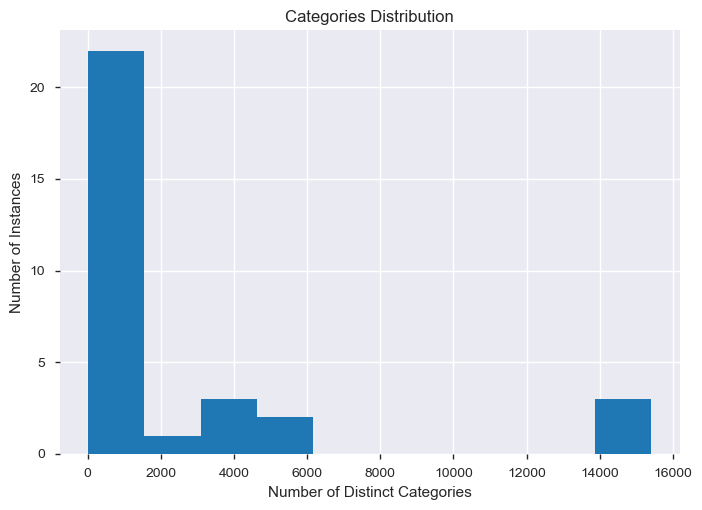

In [29]:
plt.hist(cats_count)
plt.xlabel('Number of Distinct Categories')
plt.ylabel('Number of Instances')
plt.title('Categories Distribution')
plt.show()

Para facilitar o trabalho com as categorias, podemos transformar categorias distintas em variáveis numéricas.

In [30]:
categorical_train_variables_tcat = categorical_train_variables.copy()

var_names = categorical_train_variables_tcat.columns

for var_name in var_names:
    new_column = categorical_train_variables_tcat[var_name].astype('category')
    categorical_train_variables_tcat.loc[:, var_name] = new_column

In [31]:
var_names = categorical_train_variables_tcat.columns

for var_name in var_names:
  
    missing_values = categorical_train_variables_tcat[var_name].isnull()
    if missing_values.sum() > 0:
        # new category for missing values
        categorical_train_variables_tcat[var_name].cat.add_categories('CAT_MISSING', inplace = True)
        categorical_train_variables_tcat.loc[missing_values.tolist(), var_name] = 'CAT_MISSING'

categorical_train_variables_tcat

Var193            Var195 Var196       Var197   Var198  \
15129     LrdZy8QqgUfkVShG              taul   1K8T         z32l  fhk21Ss   
33964                 RO12              taul   1K8T         487l  fhk21Ss   
49817                 RO12              taul   1K8T         sbZD  3RqwOhN   
22451                 RO12              taul   1K8T         X94c  iJzviRg   
5277                  RO12              taul   1K8T         487l  SohyOPj   
11718                 RO12              taul   1K8T         lK27  jlzcpQc   
24614                 RO12              taul   1K8T         PbOJ  GraVrOv   
24921           g62hiBSaKg              taul   1K8T         5B99  fhk21Ss   
10126                 RO12              taul   1K8T         0Xwj  T2e7I6V   
20381                 RO12              taul   1K8T         487l  b4AviRg   
46020                 RO12              taul   1K8T         LLPZ  hWvno_n   
256                   RO12              taul   1K8T         ssAy  RxDMhNR   
39354                 RO12              taul   1K8T         487l  uwNwuGt   
541                   RO12              taul   1K8T         487l  R4C9W2K   
38018                 RO12              taul   1K8T         lK27  BMnJ89M   
18970                 RO12              taul   1K8T         tXti  GUg88LT   
25112              AERks4l              taul   1K8T         iJ4u  PHNvXy8   
1821                  RO12              taul   1K8T  CAT_MISSING  innngaa   
11719                 RO12              taul   1K8T         SzjZ  KVQ8pHi   
9238               AERks4l        LfvqpCtLOY   1K8T         EPHy  fhk21Ss   
48651                 RO12              taul   1K8T         7gSz  oBS6pQK   
25676                 RO12              taul   1K8T         P9et  _ybzqEA   
32393                 RO12              taul   1K8T         487l  1nw8HPr   
46128                 RO12              taul   1K8T         h3JW  wXmgrxB   
6365                  RO12              taul   1K8T         fhwd  T7cp9gW   
26271              2Knk1KF              taul   1K8T         0Xwj  MqsvJst   
4868                  RO12              taul   1K8T         0Xwj  jZ0kHY6   
15320                 RO12              taul   1K8T         7ALb  j5_Xk4l   
18283                 RO12              taul   1K8T         WkTj  PccCPws   
21631                 RO12              taul   1K8T         JLbT  VWnxM5B   
...                    ...               ...    ...          ...      ...   
3932               AERks4l              taul   1K8T         g6No  PHNvXy8   
32389                 RO12              taul   1K8T         0Xwj  zQqh3kj   
18311                 RO12              taul   1K8T         lK27  xziuXRS   
27916                 RO12              taul   1K8T         0Xwj  cJKhhsj   
47498                 RO12              taul   1K8T         lK27  N45xuYM   
13171                 RO12              taul   1K8T         TyGl  yz3gqKR   
11148                 RO12              taul   1K8T         dTod  8Kc4q6X   
46558                 RO12              taul   1K8T         wGW5  iJzviRg   
19276     LrdZy8QqgUfkVShG              b_3Q   1K8T         7ALb  fhk21Ss   
24816                 RO12              taul   1K8T         EJC9  VcW4jEC   
40139                 RO12              taul   1K8T         487l  NxdOO2w   
2540                  RO12              taul   1K8T         487l  wGQ47iP   
49326                 RO12              taul   1K8T         PGNs  fVhJr0F   
4989                  RO12              taul   1K8T         0Xwj  fIZg0iR   
31820              2Knk1KF  CiJDdr4TQ0rGERIS   1K8T         YFAj  fhk21Ss   
38740                 RO12              taul   1K8T         Y2P0  eDdnaaX   
35883                 RO12              taul   1K8T         pdks  UKQvcTJ   
9783                  RO12              taul   1K8T         Bxva  T2ennDZ   
21564                 RO12              taul   1K8T         NHzE  mME9Ejt   
1989                  RO12              taul   1K8T         X94c  9GJGgoz   
39966           

In [32]:
var_names = categorical_train_variables_tcat.columns

for var_name in var_names:
    
    cat_column = categorical_train_variables_tcat[var_name].copy()
    
    for cat in cat_column.cat.categories:
        cat_matching = (cat_column == cat)
        
        if cat_matching.sum() < len(categorical_train_variables_tcat) * 0.05:
            if 'CAT_UNION' not in categorical_train_variables_tcat[var_name].cat.categories:
                categorical_train_variables_tcat[var_name].cat.add_categories('CAT_UNION', inplace = True)
                
            categorical_train_variables_tcat.loc[cat_matching, var_name] = 'CAT_UNION'
            categorical_train_variables_tcat[var_name].cat.remove_categories(cat, inplace = True)
            
categorical_train_variables_tcat

Var193     Var195 Var196     Var197     Var198     Var199  \
15129  CAT_UNION       taul   1K8T  CAT_UNION    fhk21Ss  CAT_UNION   
33964       RO12       taul   1K8T       487l    fhk21Ss  CAT_UNION   
49817       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
22451       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
5277        RO12       taul   1K8T       487l  CAT_UNION  CAT_UNION   
11718       RO12       taul   1K8T       lK27  CAT_UNION  CAT_UNION   
24614       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
24921  CAT_UNION       taul   1K8T  CAT_UNION    fhk21Ss  CAT_UNION   
10126       RO12       taul   1K8T       0Xwj  CAT_UNION  CAT_UNION   
20381       RO12       taul   1K8T       487l  CAT_UNION  CAT_UNION   
46020       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
256         RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
39354       RO12       taul   1K8T       487l  CAT_UNION  CAT_UNION   
541         RO12       taul   1K8T       487l  CAT_UNION  CAT_UNION   
38018       RO12       taul   1K8T       lK27  CAT_UNION  CAT_UNION   
18970       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
25112  CAT_UNION       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
1821        RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
11719       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
9238   CAT_UNION  CAT_UNION   1K8T  CAT_UNION    fhk21Ss  CAT_UNION   
48651       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
25676       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
32393       RO12       taul   1K8T       487l  CAT_UNION  CAT_UNION   
46128       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
6365        RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
26271    2Knk1KF       taul   1K8T       0Xwj  CAT_UNION  CAT_UNION   
4868        RO12       taul   1K8T       0Xwj  CAT_UNION  CAT_UNION   
15320       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
18283       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
21631       RO12       taul   1K8T       JLbT  CAT_UNION  CAT_UNION   
...          ...        ...    ...        ...        ...        ...   
3932   CAT_UNION       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
32389       RO12       taul   1K8T       0Xwj  CAT_UNION  CAT_UNION   
18311       RO12       taul   1K8T       lK27  CAT_UNION  CAT_UNION   
27916       RO12       taul   1K8T       0Xwj  CAT_UNION  CAT_UNION   
47498       RO12       taul   1K8T       lK27  CAT_UNION  CAT_UNION   
13171       RO12       taul   1K8T       TyGl  CAT_UNION  CAT_UNION   
11148       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
46558       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
19276  CAT_UNION  CAT_UNION   1K8T  CAT_UNION    fhk21Ss  CAT_UNION   
24816       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
40139       RO12       taul   1K8T       487l  CAT_UNION  CAT_UNION   
2540        RO12       taul   1K8T       487l  CAT_UNION  CAT_UNION   
49326       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
4989        RO12       taul   1K8T       0Xwj  CAT_UNION  CAT_UNION   
31820    2Knk1KF  CAT_UNION   1K8T  CAT_UNION    fhk21Ss  CAT_UNION   
38740       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
35883       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
9783        RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
21564       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
1989        RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
39966       RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
6689        RO12       taul   1K8T  CAT_UNION  CAT_UNION  CAT_UNION   
30800       RO12       taul   1K8T       0Xwj  CAT_UNION  CAT_UNION   
19368       RO12       taul   1K8T       lK27  CAT_UNION  CAT_UNION   
10971       RO12       taul   1K8T

In [33]:
profile_categories = pandas_profiling.ProfileReport(categorical_train_variables)
profile_categories

In [34]:
profile_categories_tcat = pandas_profiling.ProfileReport(categorical_train_variables_tcat)
profile_categories_tcat

Após o agrupamento de categorias pouco representativas em uma única, algumas das variáveis assumiram valor constante e por este motivo serão excluídas do dataframe.

In [35]:
rejected_columns = ['Var199', 'Var202', 'Var204', 'Var217']

for rejected_column in rejected_columns:
    categorical_train_variables_tcat = categorical_train_variables_tcat.drop(rejected_column, axis=1)

Além disso, algumas das categorias agora possuem apenas os valores CAT_UNION e CAT_MISSING, não sendo significativas.
Desconsiderando esses valores, ainda temos algumas variáveis que possuem menos de duas outras categorias distintas.

In [36]:
var_names = categorical_train_variables_tcat.columns
remove_columns = []

for var_name in var_names:
    
    cat_column = categorical_train_variables_tcat[var_name].cat.categories
    
    if len(cat_column) == 1 or len(set(cat_column) - set(['CAT_UNION', 'CAT_MISSING'])) < 2:
        remove_columns.append(var_name)

for removed_column in remove_columns:
    categorical_train_variables_tcat = categorical_train_variables_tcat.drop(removed_column, axis=1)
    
categorical_train_variables_tcat

Var193     Var197     Var203     Var205       Var206  \
15129  CAT_UNION  CAT_UNION       9_Y1       VpdQ    CAT_UNION   
33964       RO12       487l       9_Y1       VpdQ    CAT_UNION   
49817       RO12  CAT_UNION       9_Y1       09_Q  CAT_MISSING   
22451       RO12  CAT_UNION       9_Y1       09_Q         haYg   
5277        RO12       487l       9_Y1       VpdQ         IYzP   
11718       RO12       lK27       9_Y1       09_Q  CAT_MISSING   
24614       RO12  CAT_UNION       9_Y1       09_Q         IYzP   
24921  CAT_UNION  CAT_UNION       9_Y1       VpdQ         hAFG   
10126       RO12       0Xwj  CAT_UNION       VpdQ  CAT_MISSING   
20381       RO12       487l       9_Y1  CAT_UNION    CAT_UNION   
46020       RO12  CAT_UNION       9_Y1       VpdQ         IYzP   
256         RO12  CAT_UNION       9_Y1       VpdQ    CAT_UNION   
39354       RO12       487l       9_Y1    sJzTlal         IYzP   
541         RO12       487l       9_Y1       09_Q         IYzP   
38018       RO12       lK27       9_Y1       VpdQ         IYzP   
18970       RO12  CAT_UNION       9_Y1       09_Q         IYzP   
25112  CAT_UNION  CAT_UNION       9_Y1       VpdQ         IYzP   
1821        RO12  CAT_UNION  CAT_UNION       VpdQ         IYzP   
11719       RO12  CAT_UNION       9_Y1       VpdQ    CAT_UNION   
9238   CAT_UNION  CAT_UNION       9_Y1       VpdQ    CAT_UNION   
48651       RO12  CAT_UNION       9_Y1       VpdQ  CAT_MISSING   
25676       RO12  CAT_UNION       9_Y1       VpdQ         zm5i   
32393       RO12       487l       9_Y1       09_Q         IYzP   
46128       RO12  CAT_UNION       9_Y1       VpdQ         hAFG   
6365        RO12  CAT_UNION       9_Y1       VpdQ         zm5i   
26271    2Knk1KF       0Xwj  CAT_UNION       VpdQ    CAT_UNION   
4868        RO12       0Xwj  CAT_UNION       09_Q  CAT_MISSING   
15320       RO12  CAT_UNION       9_Y1       09_Q         zm5i   
18283       RO12  CAT_UNION       9_Y1       09_Q  CAT_MISSING   
21631       RO12       JLbT       9_Y1    sJzTlal         IYzP   
...          ...        ...        ...        ...          ...   
3932   CAT_UNION  CAT_UNION       9_Y1    sJzTlal         sYC_   
32389       RO12       0Xwj       HLqf       VpdQ         IYzP   
18311       RO12       lK27       9_Y1    sJzTlal         IYzP   
27916       RO12       0Xwj       HLqf       VpdQ  CAT_MISSING   
47498       RO12       lK27       9_Y1       VpdQ    CAT_UNION   
13171       RO12       TyGl       9_Y1       VpdQ         zm5i   
11148       RO12  CAT_UNION       9_Y1       VpdQ         sYC_   
46558       RO12  CAT_UNION       9_Y1       VpdQ    CAT_UNION   
19276  CAT_UNION  CAT_UNION       9_Y1       VpdQ    CAT_UNION   
24816       RO12  CAT_UNION       9_Y1       VpdQ  CAT_MISSING   
40139       RO12       487l       9_Y1       VpdQ         IYzP   
2540        RO12       487l       9_Y1       VpdQ         IYzP   
49326       RO12  CAT_UNION       9_Y1       VpdQ  CAT_MISSING   
4989        RO12       0Xwj       HLqf       09_Q    CAT_UNION   
31820    2Knk1KF  CAT_UNION       9_Y1       VpdQ    CAT_UNION   
38740       RO12  CAT_UNION       9_Y1       VpdQ  CAT_MISSING   
35883       RO12  CAT_UNION       9_Y1    sJzTlal         IYzP   
9783        RO12  CAT_UNION       9_Y1       VpdQ         haYg   
21564       RO12  CAT_UNION       9_Y1       VpdQ         IYzP   
1989        RO12  CAT_UNION       9_Y1       VpdQ         IYzP   
39966       RO12  CAT_UNION       9_Y1    sJzTlal    CAT_UNION   
6689        RO12  CAT_UNION       9_Y1       VpdQ         IYzP   
30800       RO12       0Xwj  CAT_UNION       VpdQ  CAT_MISSING   
19368       RO12       lK27       9_Y1  CAT_UNION         IYzP   
10971       RO12  CAT_UNION       9_Y1       VpdQ         IYzP   
3413     2Knk1KF  CAT_UNION       9_Y1       VpdQ         sYC_   
19665       RO12  CAT_UNION       9_Y1       VpdQ         IYzP   
3042        RO12  CAT_UNION       9_Y1       VpdQ         hAFG   
26743       RO12       0Xwj       HLqf       VpdQ 

In [37]:
categorical_train_variables_dummies = pd.get_dummies(categorical_train_variables_tcat)

76
[0.00157978 0.00157978 0.00631912 0.         0.00315956 0.00315956
 0.02843602 0.00315956 0.03475513 0.         0.00947867 0.00157978
 0.02053712 0.04739337 0.         0.         0.00947867 0.00315956
 0.         0.00315956 0.01421801 0.01105845 0.01895735 0.
 0.00789889 0.         0.00157978 0.00947867 0.00473934 0.
 0.12480253 0.         0.         0.0221169  0.00157978 0.00947867
 0.         0.0221169  0.00157978 0.01737757 0.02053712 0.0300158
 0.08688784 0.00789889 0.01421801 0.00473934 0.00157978 0.00473934
 0.01105845 0.00789889 0.00631912 0.04265403 0.0600316  0.0221169
 0.01263823 0.02685624 0.01737757 0.00947867 0.04107425 0.01895735
 0.00631912 0.03317536 0.00157978 0.01737757 0.00789889 0.
 0.00473934 0.         0.         0.00789889 0.01105845 0.00157978
 0.         0.00947867 0.00789889 0.        ]


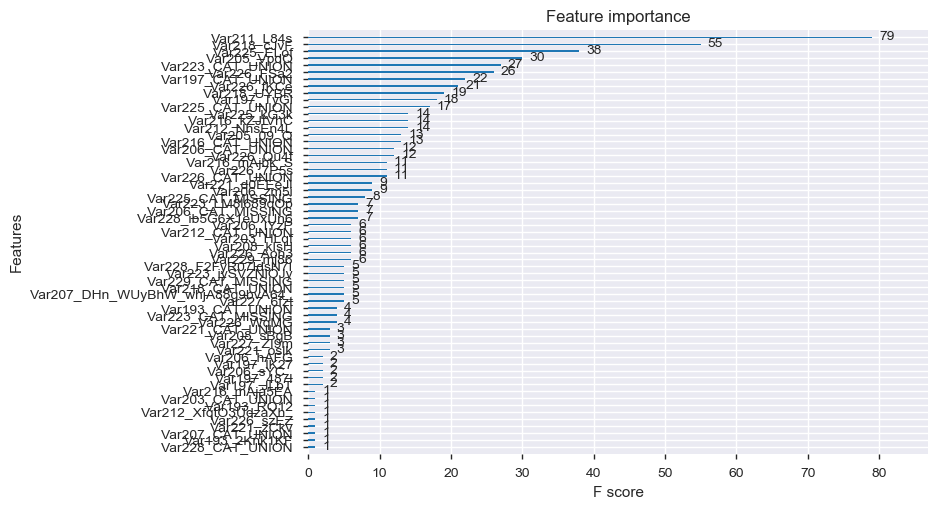

In [38]:
# split data into X and y
X = categorical_train_variables_dummies.iloc[:,0:]
y = train_class.iloc[:,0] # appetency

# fit model no training data
model = XGBClassifier()
model.fit(X, y)

# feature importance
categorical_feature_appetency = model.feature_importances_
categorical_feature_score_appetency = model.get_booster().get_fscore().items()

print(len(categorical_feature_appetency))
print(categorical_feature_appetency)

# plot
xgboost.plot_importance(model)

76
[0.00143266 0.01862464 0.         0.00573066 0.01719198 0.00286533
 0.00573066 0.03008596 0.01575931 0.00716332 0.00429799 0.00286533
 0.00859599 0.01002865 0.0530086  0.00859599 0.02148997 0.01289398
 0.01146132 0.02148997 0.01575931 0.04584527 0.01719198 0.00286533
 0.00143266 0.         0.03438395 0.00286533 0.00859599 0.
 0.07879656 0.         0.         0.04011461 0.00143266 0.00143266
 0.00143266 0.01002865 0.02005731 0.00573066 0.03008596 0.00859599
 0.03868195 0.05587393 0.02292264 0.         0.00286533 0.00859599
 0.00573066 0.01289398 0.01719198 0.         0.00286533 0.00429799
 0.03295129 0.00286533 0.01719198 0.01002865 0.03008596 0.01289398
 0.01002865 0.00429799 0.01432665 0.02578797 0.         0.
 0.00143266 0.00429799 0.00286533 0.02292264 0.00573066 0.
 0.00573066 0.00716332 0.03151862 0.        ]


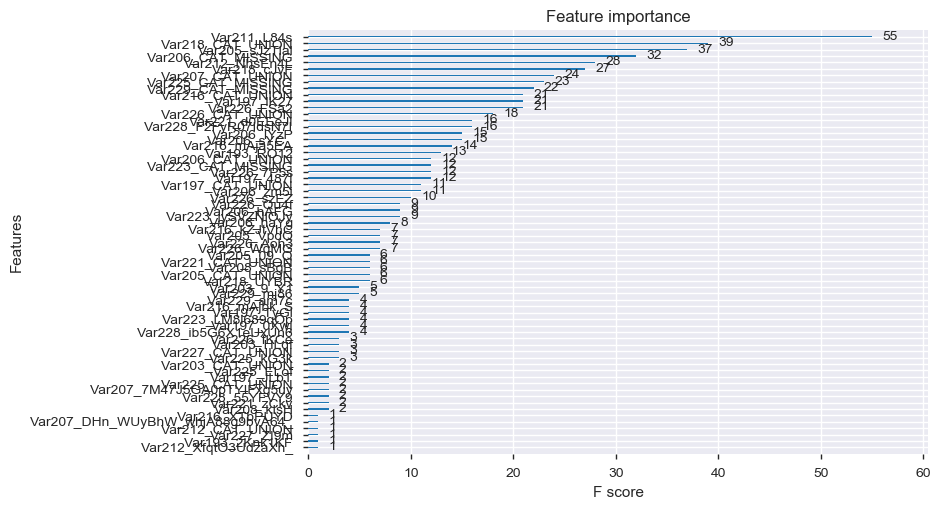

In [39]:
# split data into X and y
X = categorical_train_variables_dummies.iloc[:,0:]
y = train_class.iloc[:,1] # churn

# fit model no training data
model = XGBClassifier()
model.fit(X, y)

# feature importance
categorical_feature_churn = model.feature_importances_
categorical_feature_score_churn = model.get_booster().get_fscore().items()

print(len(categorical_feature_churn))
print(categorical_feature_churn)

# plot
xgboost.plot_importance(model)

76
[0.00652529 0.01141925 0.         0.00326264 0.00163132 0.00815661
 0.00163132 0.00815661 0.00815661 0.00163132 0.00815661 0.02120718
 0.01631321 0.01305057 0.         0.03588907 0.01957586 0.00815661
 0.         0.00489396 0.00652529 0.01141925 0.01468189 0.00652529
 0.01141925 0.00489396 0.00163132 0.00163132 0.         0.
 0.10440457 0.         0.01468189 0.01305057 0.00489396 0.00652529
 0.00815661 0.02773246 0.02936378 0.         0.05709625 0.05709625
 0.00163132 0.01957586 0.00163132 0.00163132 0.00489396 0.00978793
 0.06525286 0.         0.00815661 0.00489396 0.03752039 0.01794454
 0.06199021 0.02610114 0.00815661 0.00815661 0.03425775 0.01957586
 0.00815661 0.00978793 0.00163132 0.01305057 0.01631321 0.00163132
 0.00163132 0.01957586 0.00978793 0.00163132 0.         0.00326264
 0.00326264 0.00489396 0.00815661 0.00652529]


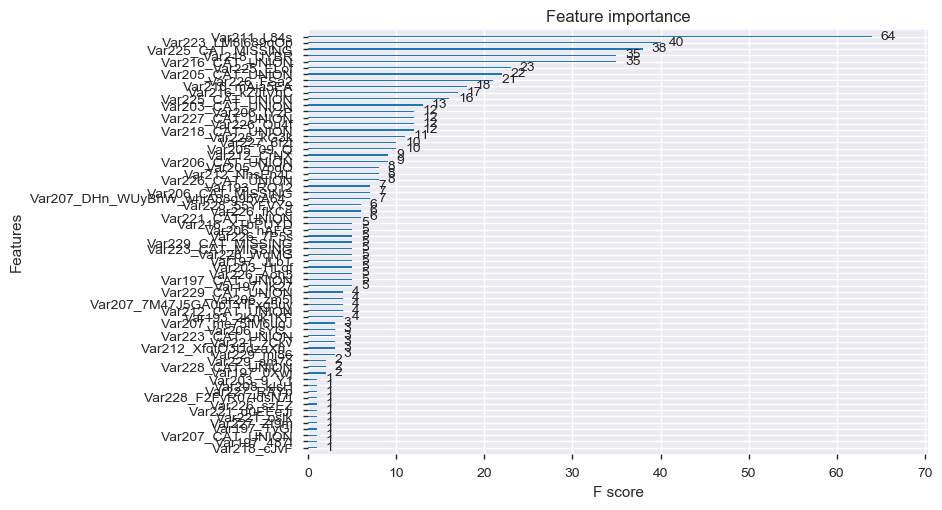

In [40]:
# split data into X and y
X = categorical_train_variables_dummies.iloc[:,0:]
y = train_class.iloc[:,2] # upselling

# fit model no training data
model = XGBClassifier()
model.fit(X, y)

# feature importance
categorical_feature_upselling = model.feature_importances_
categorical_feature_score_upselling = model.get_booster().get_fscore().items()

print(len(categorical_feature_upselling))
print(categorical_feature_upselling)

# plot
xgboost.plot_importance(model)

In [49]:
# trata variáveis categóricas do teste para criar mesmas classes
categorical_test_variables = test_file.iloc[:,41:]
categorical_test_variables

Var193            Var195 Var196  \
2666                                    2Knk1KF              taul   1K8T   
33254                                   2Knk1KF              taul   1K8T   
13431                                      RO12              taul   1K8T   
13505                                      RO12              taul   1K8T   
20174                                      RO12              taul   1K8T   
39056                                   2Knk1KF              taul   1K8T   
9500                                       RO12              taul   1K8T   
47145                                      RO12              taul   1K8T   
19859                                   2Knk1KF              taul   1K8T   
11368                                      RO12              taul   1K8T   
5619                                    2Knk1KF              taul   1K8T   
37679                          LrdZy8QqgUfkVShG              taul   1K8T   
33578                                g62hiBSaKg              taul   1K8T   
38154                                      RO12              taul   1K8T   
27470                                      RO12              taul   1K8T   
36156                                      RO12              taul   1K8T   
37659                       ByQdnLRlFnny2k4AJzG  CiJDdr4TQ0rGERIS   z3mO   
18929                                   2Knk1KF              taul   1K8T   
32459                                      RO12              taul   1K8T   
6314                                       RO12              taul   1K8T   
16769                                      RO12              taul   1K8T   
30462                                      RO12              taul   1K8T   
46204                                      RO12              taul   1K8T   
41531                                   2Knk1KF              taul   1K8T   
46451                                      RO12              taul   1K8T   
33857                                      RO12              taul   1K8T   
12581                    eSGpMwS8zSGgq_trOpckZ5              taul   1K8T   
33990                                      RO12              taul   1K8T   
33080                                      RO12              taul   1K8T   
1899                                       RO12              taul   1K8T   
...                                         ...               ...    ...   
45194                                   2Knk1KF              taul   1K8T   
1354                                 vuPfq6YcbX  CiJDdr4TQ0rGERIS   1K8T   
31064                                      RO12              taul   1K8T   
5889                                    AERks4l              taul   1K8T   
24156                                      RO12              taul   1K8T   
36460                                      RO12              taul   1K8T   
22699                                g62hiBSaKg              taul   1K8T   
10964                                      RO12              taul   1K8T   
35639                                   AERks4l              taul   1K8T   
22352                                   2Knk1KF              taul   1K8T   
38147                                ND3t9Yro9U              taul   1K8T   
48180                                      RO12              taul   1K8T   
13491                                      RO12              taul   1K8T   
47489                                      RO12              taul   1K8T   
15640                    Fveq5yuDUj6drSMiZO3mXe              taul   1K8T   
40572                                      RO12              taul   1K8T   
24838                                      RO12              taul   1K8T   
28948                                      RO12              taul   1K8T   
7754                                       RO12              taul   1K8T   
31707                                      RO12              taul   1K8T   
7592                                       RO12              taul   1K8T   
23105        

In [50]:
categorical_test_variables_tcat = categorical_test_variables.copy()

var_names = categorical_test_variables_tcat.columns

for var_name in var_names:
    new_column = categorical_test_variables_tcat[var_name].astype('category')
    categorical_test_variables_tcat.loc[:, var_name] = new_column

In [68]:
var_names = categorical_test_variables_tcat.columns

for var_name in var_names:
  
    missing_values = categorical_test_variables_tcat[var_name].isnull()
    if missing_values.sum() > 0:
        # new category for missing values
        categorical_test_variables_tcat[var_name].cat.add_categories('CAT_MISSING', inplace = True)
        categorical_test_variables_tcat.loc[missing_values.tolist(), var_name] = 'CAT_MISSING'

categorical_test_variables_tcat

Var193            Var195 Var196  \
2666                                    2Knk1KF              taul   1K8T   
33254                                   2Knk1KF              taul   1K8T   
13431                                      RO12              taul   1K8T   
13505                                      RO12              taul   1K8T   
20174                                      RO12              taul   1K8T   
39056                                   2Knk1KF              taul   1K8T   
9500                                       RO12              taul   1K8T   
47145                                      RO12              taul   1K8T   
19859                                   2Knk1KF              taul   1K8T   
11368                                      RO12              taul   1K8T   
5619                                    2Knk1KF              taul   1K8T   
37679                          LrdZy8QqgUfkVShG              taul   1K8T   
33578                                g62hiBSaKg              taul   1K8T   
38154                                      RO12              taul   1K8T   
27470                                      RO12              taul   1K8T   
36156                                      RO12              taul   1K8T   
37659                       ByQdnLRlFnny2k4AJzG  CiJDdr4TQ0rGERIS   z3mO   
18929                                   2Knk1KF              taul   1K8T   
32459                                      RO12              taul   1K8T   
6314                                       RO12              taul   1K8T   
16769                                      RO12              taul   1K8T   
30462                                      RO12              taul   1K8T   
46204                                      RO12              taul   1K8T   
41531                                   2Knk1KF              taul   1K8T   
46451                                      RO12              taul   1K8T   
33857                                      RO12              taul   1K8T   
12581                    eSGpMwS8zSGgq_trOpckZ5              taul   1K8T   
33990                                      RO12              taul   1K8T   
33080                                      RO12              taul   1K8T   
1899                                       RO12              taul   1K8T   
...                                         ...               ...    ...   
45194                                   2Knk1KF              taul   1K8T   
1354                                 vuPfq6YcbX  CiJDdr4TQ0rGERIS   1K8T   
31064                                      RO12              taul   1K8T   
5889                                    AERks4l              taul   1K8T   
24156                                      RO12              taul   1K8T   
36460                                      RO12              taul   1K8T   
22699                                g62hiBSaKg              taul   1K8T   
10964                                      RO12              taul   1K8T   
35639                                   AERks4l              taul   1K8T   
22352                                   2Knk1KF              taul   1K8T   
38147                                ND3t9Yro9U              taul   1K8T   
48180                                      RO12              taul   1K8T   
13491                                      RO12              taul   1K8T   
47489                                      RO12              taul   1K8T   
15640                    Fveq5yuDUj6drSMiZO3mXe              taul   1K8T   
40572                                      RO12              taul   1K8T   
24838                                      RO12              taul   1K8T   
28948                                      RO12              taul   1K8T   
7754                                       RO12              taul   1K8T   
31707                                      RO12              taul   1K8T   
7592                                       RO12              taul   1K8T   
23105        

In [69]:
categorical_test_variables_dummies = pd.get_dummies(categorical_test_variables_tcat)
categorical_test_variables_dummies

Var193_2Knk1KF  Var193_2wnefc9ISdLjfQoAYBI  \
2666                1                           0   
33254               1                           0   
13431               0                           0   
13505               0                           0   
20174               0                           0   
39056               1                           0   
9500                0                           0   
47145               0                           0   
19859               1                           0   
11368               0                           0   
5619                1                           0   
37679               0                           0   
33578               0                           0   
38154               0                           0   
27470               0                           0   
36156               0                           0   
37659               0                           0   
18929               1                           0   
32459               0                           0   
6314                0                           0   
16769               0                           0   
30462               0                           0   
46204               0                           0   
41531               1                           0   
46451               0                           0   
33857               0                           0   
12581               0                           0   
33990               0                           0   
33080               0                           0   
1899                0                           0   
...               ...                         ...   
45194               1                           0   
1354                0                           0   
31064               0                           0   
5889                0                           0   
24156               0                           0   
36460               0                           0   
22699               0                           0   
10964               0                           0   
35639               0                           0   
22352               1                           0   
38147               0                           0   
48180               0                           0   
13491               0                           0   
47489               0                           0   
15640               0                           0   
40572               0                           0   
24838               0                           0   
28948               0                           0   
7754                0                           0   
31707               0                           0   
7592                0                           0   
23105               0                           0   
29716               0                           0   
15841               0                           0   
29374               0                           0   
36785               0                           0   
27621               0                           0   
43013               0                           0   
40827               0                           0   
18979               0                           0   

       Var193_5QKIjwyXr4MCZTEp7uAkS8PtBLcn  \
2666                                     0   
33254                                    0   
13431                                    0   
13505                                    0   
20174                                    0   
39056                                    0   
9500                                     0   
47145                                    0   
19859                                    0   
11368                                    0   
5619                                     0   
37679                                    0   
33578                                    0   
38154                                    0   
27470                         

In [131]:
# Appetency

final_numeric_labels_appetency = []

for f in feature_score_appetency:
    if f[1] > 15:
        final_numeric_labels_appetency.append(f[0])
        
final_numeric_labels_appetency

['Var126',
 'Var38',
 'Var74',
 'Var189',
 'Var73',
 'Var113',
 'Var81',
 'Var57',
 'Var140',
 'Var6',
 'Var133',
 'Var94']

In [132]:
train_numeric_appetency = train_file[final_numeric_labels_appetency]

In [133]:
final_categorical_labels_appetency = []

for f in categorical_feature_score_appetency:
    if f[1] > 10 and 'UNION' not in f[0]:
        final_categorical_labels_appetency.append(f[0])
        
final_categorical_labels_appetency

['Var218_cJvF',
 'Var211_L84s',
 'Var205_VpdQ',
 'Var197_TyGl',
 'Var226_FSa2',
 'Var212_NhsEn4L',
 'Var225_ELof',
 'Var205_09_Q',
 'Var226_fKCe',
 'Var216_kZJtVhC',
 'Var226_Qu4f',
 'Var226_7P5s',
 'Var218_UYBR',
 'Var216_mAjbk_S',
 'Var225_kG3k']

In [134]:
train_categorical_appetency = categorical_train_variables_dummies[final_categorical_labels_appetency]

In [135]:
train_appetency = pd.concat([train_numeric_appetency, train_categorical_appetency], axis=1, sort=False)

In [160]:
from sklearn.ensemble import RandomForestClassifier
from multiprocessing import cpu_count

rf_model_A = RandomForestClassifier(
    n_estimators=1500,
    criterion='entropy',
    max_depth=None,  
    min_samples_split=50,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    max_leaf_nodes=None,   
    bootstrap=True,
    oob_score=False,   
    n_jobs=cpu_count() - 2, 
    class_weight='balanced',   
    verbose=1,
    warm_start=False)

In [161]:
rf_model_A.fit(X=train_appetency, y=train_class.iloc[:,0].astype(float))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   45.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  2.9min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:  4.6min
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:  5.5min finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=1500, n_jobs=2, oob_score=False,
            random_state=None, verbose=1, warm_start=False)

In [162]:
test_numeric_appetency = test_file[final_numeric_labels_appetency]
test_categorical_appetency = categorical_test_variables_dummies[final_categorical_labels_appetency]
test_appetency = pd.concat([test_numeric_appetency, test_categorical_appetency], axis=1, sort=False)

In [232]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(10,5))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")
    plt.savefig('../data/plot_roc_curve.png')
    plt.show()
    return (f, ax)

def compute_roc_auc(index, model):
    y_predict = model.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   38.8s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:  3.8min
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:  4.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    2.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:    4.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Par

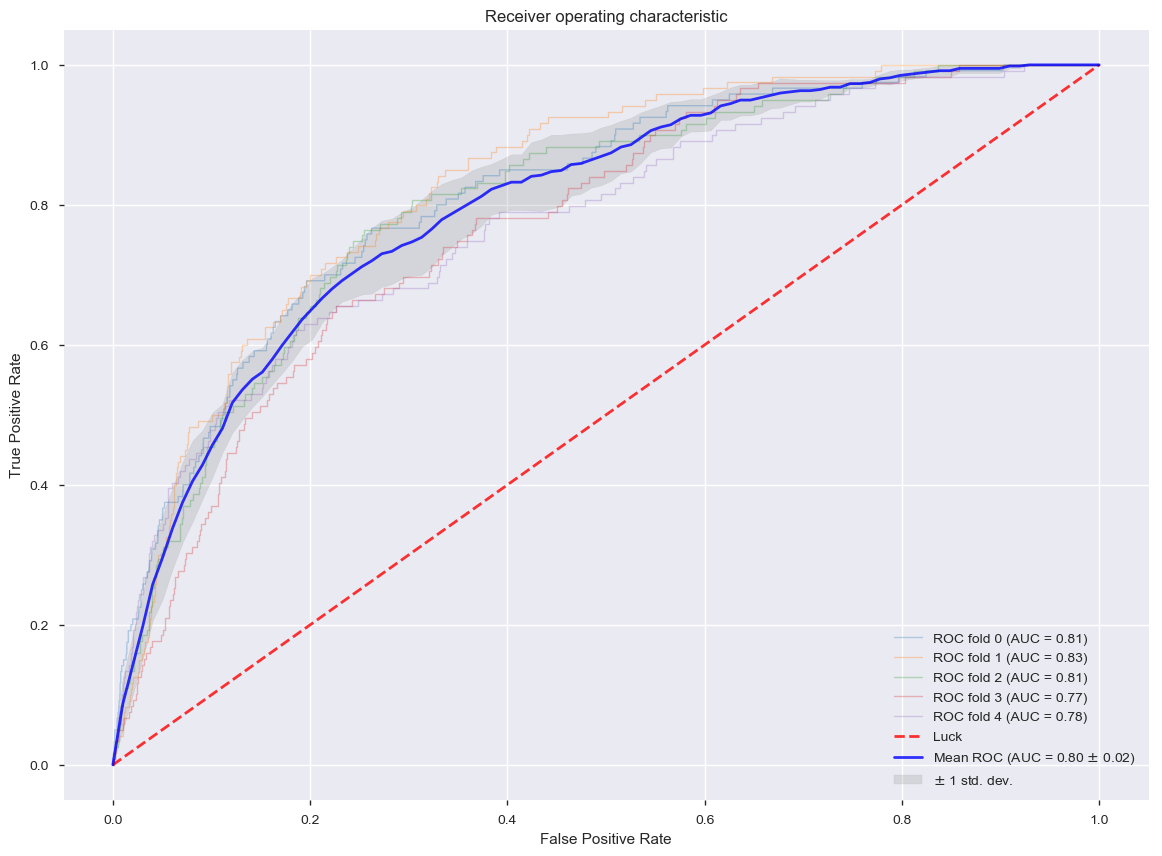

AUC Train  AUC Test
0   0.996757  0.814798
1   0.995882  0.830914
2   0.996671  0.805118
3   0.995574  0.772671
4   0.997181  0.776849

In [187]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
X = train_appetency
y = train_class.iloc[:,0].astype(float)
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    rf_model_A.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train, rf_model_A)
    fpr, tpr, auc_score = compute_roc_auc(test, rf_model_A)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs)
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [196]:
appetency_predict = rf_model_A.predict(test_appetency)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:    2.4s finished


In [243]:
rf_model_A.score(test_appetency, test_class.iloc[:,1].astype(float))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:    2.6s finished


0.9094

In [219]:
# Churn

final_numeric_labels_churn = []

for f in feature_score_churn:
    if f[1] > 12:
        final_numeric_labels_churn.append(f[0])
        
final_numeric_labels_churn

['Var126',
 'Var38',
 'Var74',
 'Var189',
 'Var153',
 'Var73',
 'Var113',
 'Var81',
 'Var132',
 'Var13',
 'Var57',
 'Var140',
 'Var6',
 'Var119',
 'Var149',
 'Var125',
 'Var133',
 'Var94']

In [222]:
train_numeric_churn = train_file[final_numeric_labels_churn]

In [223]:
final_categorical_labels_churn = []

for f in categorical_feature_score_churn:
    if f[1] > 10 and 'UNION' not in f[0]:
        final_categorical_labels_churn.append(f[0])
        
final_categorical_labels_churn

['Var212_NhsEn4L',
 'Var205_sJzTlal',
 'Var226_FSa2',
 'Var229_CAT_MISSING',
 'Var228_F2FyR07IdsN7I',
 'Var197_487l',
 'Var193_RO12',
 'Var206_CAT_MISSING',
 'Var197_lK27',
 'Var211_L84s',
 'Var206_sYC_',
 'Var218_cJvF',
 'Var225_CAT_MISSING',
 'Var206_IYzP',
 'Var206_zm5i',
 'Var226_7P5s',
 'Var221_d0EEeJi',
 'Var223_CAT_MISSING',
 'Var216_mAja5EA']

In [224]:
train_categorical_churn = categorical_train_variables_dummies[final_categorical_labels_churn]

In [225]:
train_churn = pd.concat([train_numeric_churn, train_categorical_churn], axis=1, sort=False)

In [226]:
rf_model_C = RandomForestClassifier(
    n_estimators=1500,
    criterion='entropy',
    max_depth=None,  
    min_samples_split=50,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    max_leaf_nodes=None,   
    bootstrap=True,
    oob_score=False,   
    n_jobs=cpu_count() - 2, 
    class_weight='balanced',   
    verbose=1,
    warm_start=False)

In [227]:
rf_model_C.fit(X=train_churn, y=train_class.iloc[:,1].astype(float))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   25.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  6.6min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed: 10.7min
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed: 12.9min finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=1500, n_jobs=2, oob_score=False,
            random_state=None, verbose=1, warm_start=False)

In [228]:
test_numeric_churn = test_file[final_numeric_labels_churn]
test_categorical_churn = categorical_test_variables_dummies[final_categorical_labels_churn]
test_churn = pd.concat([test_numeric_churn, test_categorical_churn], axis=1, sort=False)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   16.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:  6.3min
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:  7.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    2.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    3.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:    5.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Par

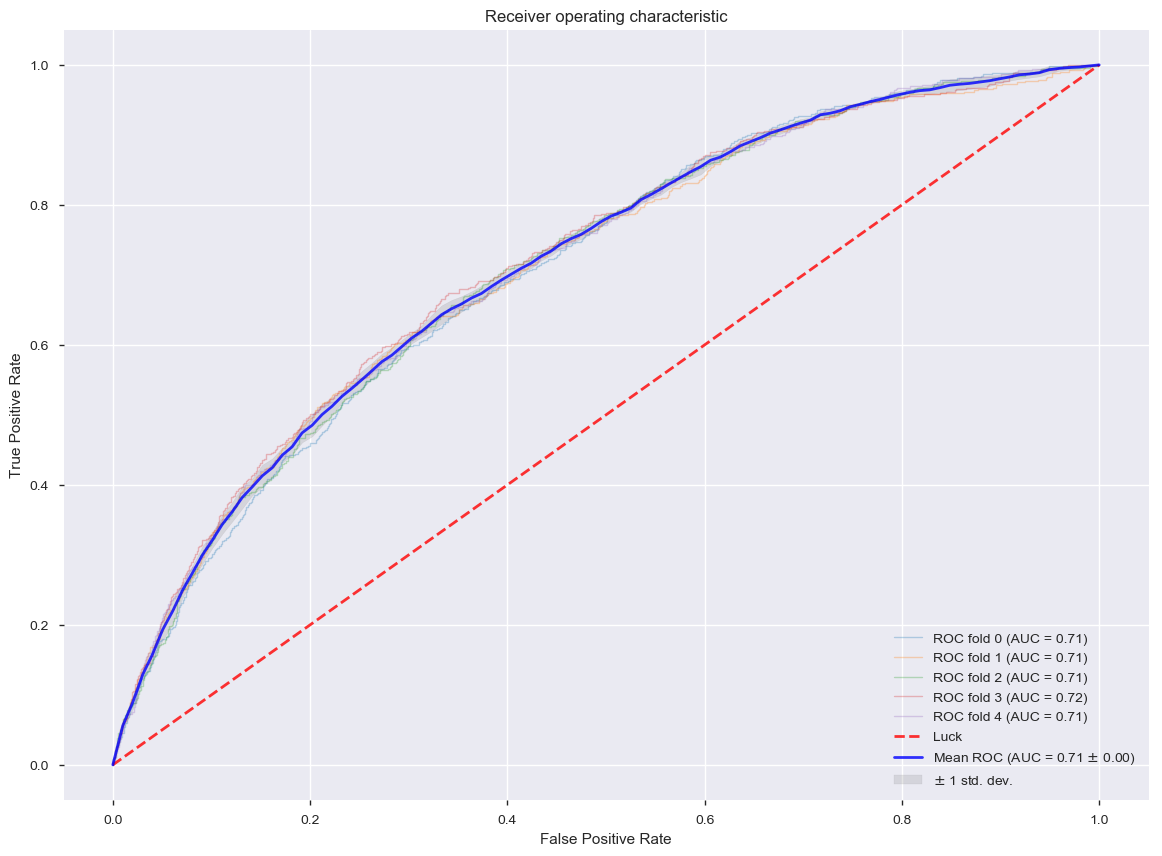

AUC Train  AUC Test
0   0.899676  0.710019
1   0.900203  0.711378
2   0.898843  0.712632
3   0.900861  0.720322
4   0.899317  0.714995

In [231]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
X = train_churn
y = train_class.iloc[:,1].astype(float)
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    rf_model_U.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train, rf_model_U)
    fpr, tpr, auc_score = compute_roc_auc(test, rf_model_U)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs)
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [234]:
churn_predict = rf_model_C.predict(test_churn)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    3.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    7.1s
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:    9.9s finished


In [238]:
rf_model_C.score(test_churn, test_class.iloc[:,1].astype(float))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:    3.4s finished


0.8903333333333333

In [198]:
# Upselling

final_numeric_labels_upselling = []

for f in feature_score_upselling:
    if f[1] > 10:
        final_numeric_labels_upselling.append(f[0])
        
final_numeric_labels_upselling

['Var126',
 'Var28',
 'Var113',
 'Var153',
 'Var81',
 'Var189',
 'Var73',
 'Var134',
 'Var163',
 'Var57',
 'Var38',
 'Var13',
 'Var76',
 'Var119',
 'Var94',
 'Var78',
 'Var144',
 'Var140']

In [199]:
train_numeric_upselling = train_file[final_numeric_labels_upselling]

In [200]:
final_categorical_labels_upselling = []

for f in categorical_feature_score_upselling:
    if f[1] > 8 and 'UNION' not in f[0]:
        final_categorical_labels_upselling.append(f[0])
        
final_categorical_labels_upselling

['Var211_L84s',
 'Var225_ELof',
 'Var226_FSa2',
 'Var223_LM8l689qOp',
 'Var225_CAT_MISSING',
 'Var218_UYBR',
 'Var225_kG3k',
 'Var216_kZJtVhC',
 'Var226_Qu4f',
 'Var216_mAja5EA',
 'Var205_09_Q',
 'Var227_6fzt',
 'Var206_IYzP',
 'Var212_CrNX']

In [201]:
train_categorical_upselling = categorical_train_variables_dummies[final_categorical_labels_upselling]

In [245]:
train_upselling = pd.concat([train_numeric_upselling, train_categorical_upselling], axis=1, sort=False)

In [246]:
rf_model_U = RandomForestClassifier(
    n_estimators=1500,
    criterion='entropy',
    max_depth=None,  
    min_samples_split=100,
    min_samples_leaf=50,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    max_leaf_nodes=None,   
    bootstrap=True,
    oob_score=False,   
    n_jobs=cpu_count() - 2, 
    class_weight='balanced',   
    verbose=1,
    warm_start=False)

In [247]:
rf_model_U.fit(X=train_upselling, y=train_class.iloc[:,2].astype(float))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  4.8min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:  7.4min
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:  8.9min finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=50,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            n_estimators=1500, n_jobs=2, oob_score=False,
            random_state=None, verbose=1, warm_start=False)

In [248]:
test_numeric_upselling = test_file[final_numeric_labels_upselling]
test_categorical_upselling = categorical_test_variables_dummies[final_categorical_labels_upselling]
test_upselling = pd.concat([test_numeric_upselling, test_categorical_upselling], axis=1, sort=False)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   12.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   53.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  3.7min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:  5.9min
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:  7.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    3.6s
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:    4.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Par

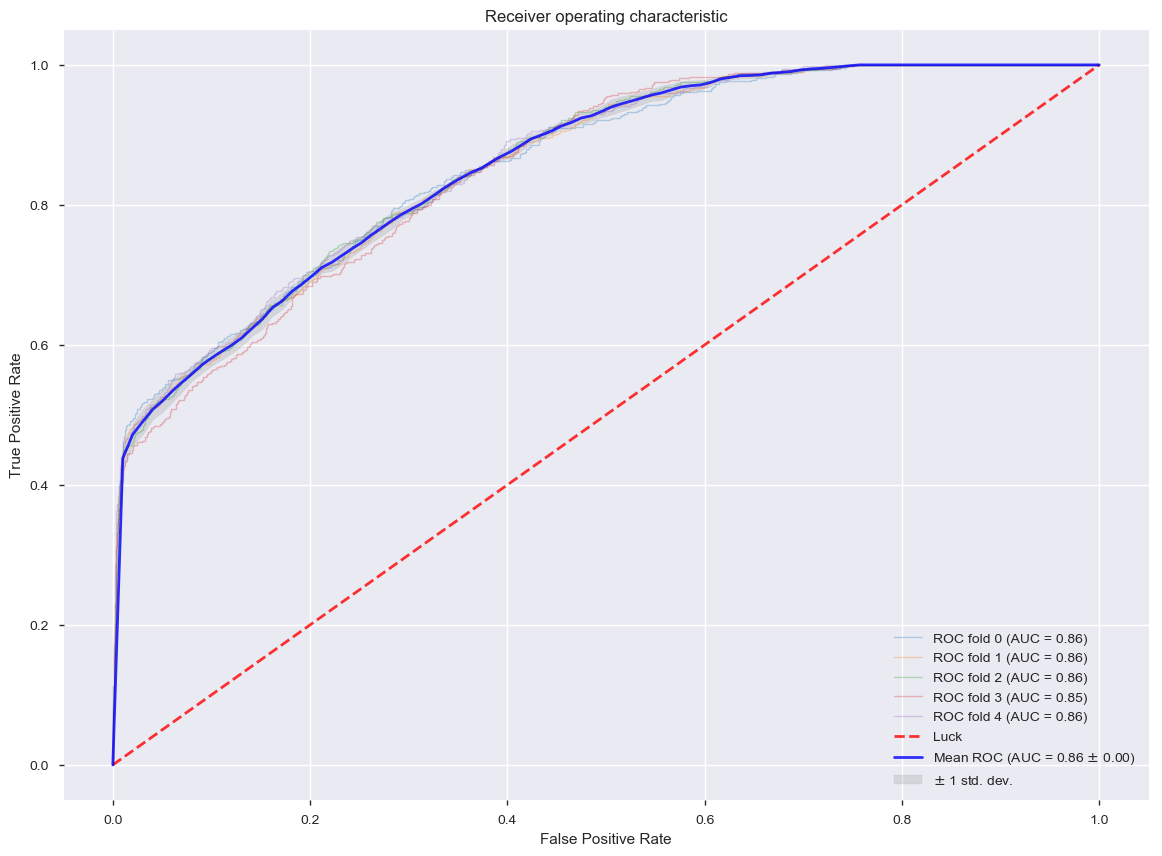

AUC Train  AUC Test
0   0.970576  0.856630
1   0.970177  0.856098
2   0.970922  0.858331
3   0.970428  0.852109
4   0.970103  0.859800

In [214]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
X = train_upselling
y = train_class.iloc[:,2].astype(float)
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    rf_model_U.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train, rf_model_U)
    fpr, tpr, auc_score = compute_roc_auc(test, rf_model_U)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs)
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [251]:
upselling_predict = rf_model_U.predict(test_upselling)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:    2.6s finished


In [252]:
rf_model_U.score(test_upselling, test_class.iloc[:,2].astype(float))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:    2.5s finished


0.9272666666666667

In [283]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('YlOrRd')

    plt.figure(figsize=(4, 3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names, rotation=90)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig('../data/confusionMatrix.png')
    plt.show()


Appetency
True positive: 35
True negative: 14441
False positive: 252
False negative: 272


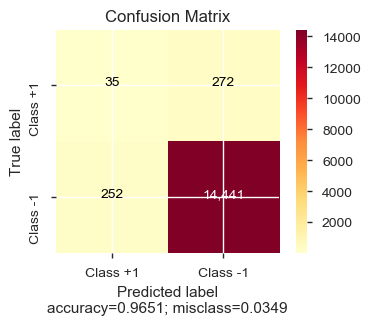

In [286]:
tp = 0
tn = 0
fp = 0
fn = 0

for i in range(15000):
    true_value = appetency_predict[i]
    prediction_value = test_class.iloc[:,0][i]
    
    if true_value == prediction_value:
        if true_value == 1:
            tp += 1
        else:
            tn += 1
    else:
        if prediction_value == 1:
            fp += 1
        else: 
            fn += 1
            
print('\nAppetency')
print('True positive:', tp)
print('True negative:', tn)
print('False positive:', fp)
print('False negative:', fn)

plot_confusion_matrix(cm           = np.array([[tp, fn],
                                              [fp, tn]]), 
                      normalize    = False,
                      target_names = ['Class +1', 'Class -1'],
                      title        = "Confusion Matrix")


Churn
True positive: 197
True negative: 13039
False positive: 888
False negative: 876


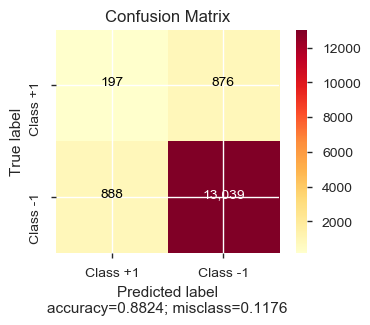

In [287]:
tp = 0
tn = 0
fp = 0
fn = 0

for i in range(15000):
    true_value = churn_predict[i]
    prediction_value = test_class.iloc[:,1][i]
    
    if true_value == prediction_value:
        if true_value == 1:
            tp += 1
        else:
            tn += 1
    else:
        if prediction_value == 1:
            fp += 1
        else: 
            fn += 1
            
print('\nChurn')
print('True positive:', tp)
print('True negative:', tn)
print('False positive:', fp)
print('False negative:', fn)

plot_confusion_matrix(cm           = np.array([[tp, fn],
                                              [fp, tn]]), 
                      normalize    = False,
                      target_names = ['Class +1', 'Class -1'],
                      title        = "Confusion Matrix")


Upselling
True positive: 439
True negative: 13175
False positive: 668
False negative: 718


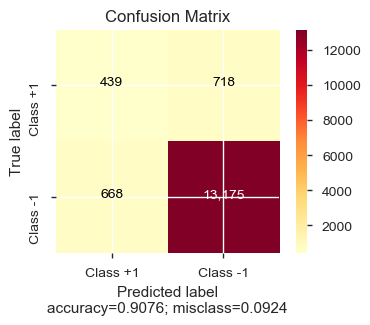

In [288]:
tp = 0
tn = 0
fp = 0
fn = 0

for i in range(15000):
    true_value = upselling_predict[i]
    prediction_value = test_class.iloc[:,2][i]
    
    if true_value == prediction_value:
        if true_value == 1:
            tp += 1
        else:
            tn += 1
    else:
        if prediction_value == 1:
            fp += 1
        else: 
            fn += 1
            
print('\nUpselling')
print('True positive:', tp)
print('True negative:', tn)
print('False positive:', fp)
print('False negative:', fn)

plot_confusion_matrix(cm           = np.array([[tp, fn],
                                              [fp, tn]]), 
                      normalize    = False,
                      target_names = ['Class +1', 'Class -1'],
                      title        = "Confusion Matrix")

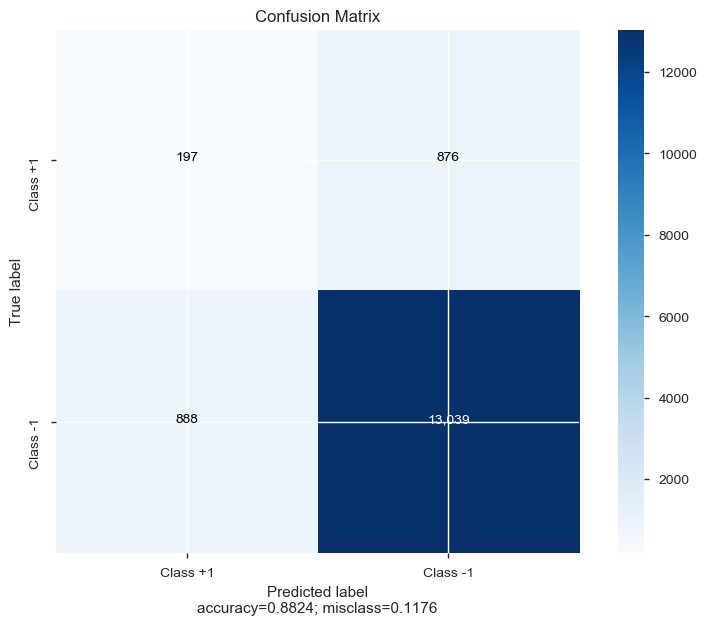

In [267]:
plot_confusion_matrix(cm           = np.array([[tp, fn],
                                              [fp, tn]]), 
                      normalize    = False,
                      target_names = ['Class +1', 'Class -1'],
                      title        = "Confusion Matrix")